# **Laboratório 01 - Expansão em Séries de Taylor**

Aluno:

**Exemplo 01** - Expansão da função $f(x) = e^x$, via Série de MacLaurin

$$
f(x) = e^x \approx \sum_{k=0}^{N}\frac{x^k}{k!}
$$

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import math

A solução numérica com n = : 10 é =  [ 2.71828153  7.38871252 20.06339286]
Com Erro relativo de [1.11425478e-07 4.64980750e-05 1.10248813e-03]


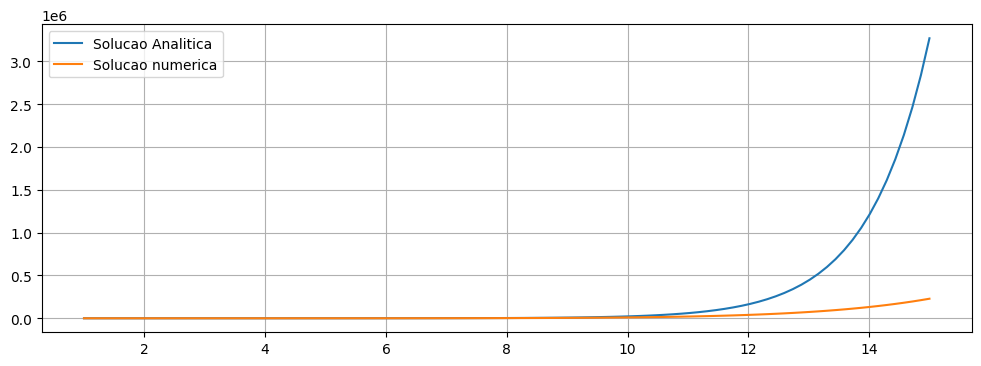

In [9]:
def fatorial(n):
    result = 1
    for i in range(1, n + 1):
        result *= i
    return result

def f_exp(x,n):
    soma = 0
    for k in range(n):
        soma += x**k/fatorial(k)

    return soma

x = np.array([1,2,3])
n = 10
sn = f_exp(x,n)
print('A solução numérica com n = :',n, 'é = ',sn)
Er = np.abs(np.exp(x) - sn)/np.exp(x)
print('Com Erro relativo de', Er)

xx = np.linspace(1, 15, 100)
Sa = np.exp(xx)
Sn = f_exp(xx, n)

plt.figure(figsize=(12, 4))
plt.plot(xx, Sa, label = "Solucao Analitica")
plt.plot(xx, Sn, label = "Solucao numerica")
plt.grid()
plt.legend()
plt.show()

**Exemplo 02** - Implementar a função

\begin{equation}
     f(x) = sen(x) \approx \sum_{k=0}^{N} (-1)^k \frac{x^{2k+1}}{(2k+1)!}
\end{equation}

In [26]:
def f_seno(x,n):
    soma = 0
    for k in range (n):
        num = x ** (2*k + 1)
        den = 2*k + 1
        coef = (-1)**k
        soma = soma + (coef * (num / math.factorial(den)))

    return soma

x = np.pi/4
n = 10
sn = f_seno(x,n)
print(sn)
    

0.7071067811865475


**Exemplo 03** : Use a expansão em Série de MacLaurin para mostrar que

\begin{equation}
e^{ix} = cos\,x + i\,sen\,x,\,\,\,\,\,\,i = \sqrt{-1}.
\end{equation}

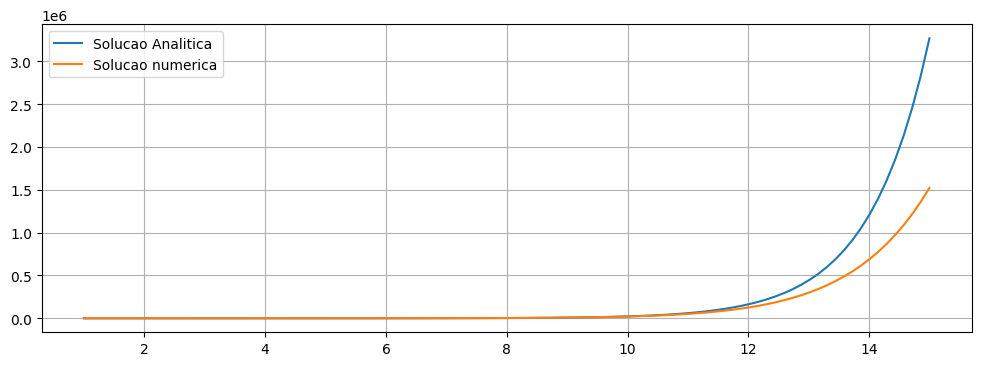

# **Exercícios**

**01** - O valor de $\pi$ pode ser aproximado por meio da seguinte expansão em série:

\begin{equation}
\pi \approx 4 \sum_{i=1}^{n} (-1)^{i-1} \frac{1}{2i - 1}
\end{equation}

escreva uma função que retorne o valor aproximado de $\pi$ que receba como parâmetro de entrada os $n$ termos da série. Calcule o erro relativo para diferentes valores de $n$. Por exemplo: $n = 5,\,10,\,20,\,30.$



0.06305396909634241
0.03175237710923643
0.015905577976462196
0.010607386305403936
0.007956504726161022
0.006365561421825672
0.005304796483322961
0.004547052143197559
0.003978718182890221
0.003536667370223468
0.00318301929431018


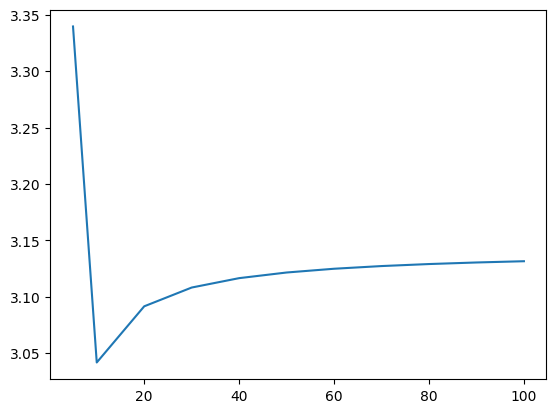

In [22]:
def calc_pi(n):
    pi_aprox = 0
    for i in range(1, n+1):
        pi_aprox += ((-1)**(i - 1)) * (1 / (2*i - 1))
    return 4*pi_aprox

#sa -> solucao analitica --> valor real
#sn -> solucao numerica --> valor calculado pela funcao

def erro_relativo(sn, sa):
    return abs((sa - sn) / sa)

pi = np.pi

valores = [5, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
valores_pi = []
for i in range(len(valores)):
    sn = calc_pi(valores[i])
    valores_pi.append(sn)
    print(erro_relativo(sn, pi))
    


plt.plot(valores, valores_pi)
plt.show()

**02** - Use a expansão em série de Taylor para mostrar que
\begin{equation}
    \frac{sen\,x}{x} \approx 1
\end{equation}
com um valor bem pequeno em $x.$



In [29]:
x = 1e-10
valor = f_seno(x, 15)/x
print(valor)


1.0


**03** - Escreva a expansão em série de Taylor para $f(x) = e^{x^2}$ em torno da origem. Defina uma função $exp$\_$dupla(x,n),$ para calcular uma aproximação para $f(x)$ utilizando os $n$ primeiros termos da expansão. Adapte a função para receber como parâmetro de entrada um vetor.



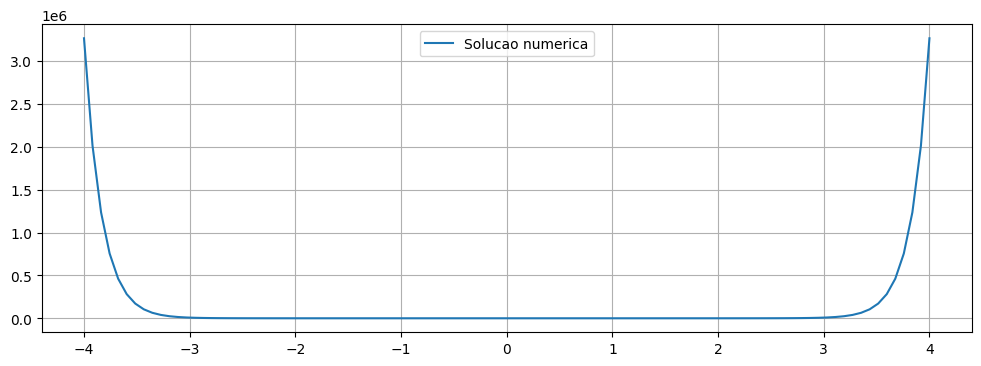

In [32]:
def fatorial(n):
    result = 1
    for i in range(1, n + 1):
        result *= i
    return result

def f_exp_x2(x,n):
    soma = 0
    for k in range(n):
        soma += x**(2*k)/fatorial(k)

    return soma

xx = np.linspace(-4, 4, 100)

n = 15
Sn = f_exp_x2(xx, n)

plt.figure(figsize=(12, 4))
plt.plot(xx, Sn, label = "Solucao numerica")
plt.grid()
plt.legend()
plt.show()

**04** - Sabendo que o seno hiperbólico pode ser obtido por meio da seguinte expansão,
\begin{equation}
    senh\,x = \sum_{k=0}^{\infty} \frac{x^{2k+1}}{(2k+1)!}
\end{equation}
o cosseno hiperbólico por,
\begin{equation}
    cosh\,x = \sum_{k=0}^{\infty} \frac{x^{2k}}{(2k)!}
\end{equation}
e a tangente hiperbólica é dada por,
\begin{equation}
    tanh\,x = \frac{senh\,x}{cosh\,x}
\end{equation}
calcule a tangente hiperbólica de $x_0 = 0,5$ a partir das funções $ senh\,x$ e $ cosh\,x$, com um erro relatico de aproximadamente $10^{-5}.$ Gerar os gráficos e comparar com a função $np.tanh(x)$.

0.4621171572600098
1.20123545207443e-16


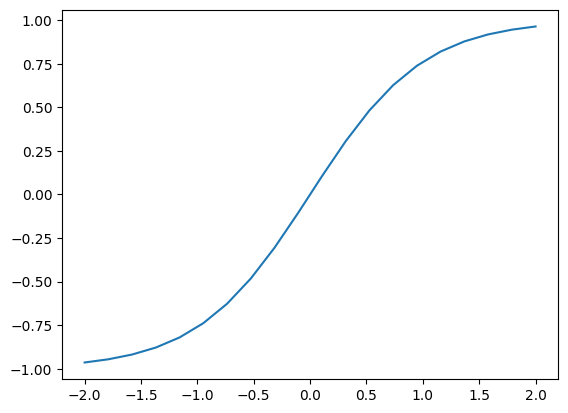

In [33]:
def f_senh(x, N):
    senh_aprox = 0
    for n in range(N):
        num = (x ** (2*n + 1))
        den = math.factorial(2*n + 1)
        senh_aprox = senh_aprox + (num/den)
    return senh_aprox

def f_cosh(x, N):
    cosh_aprox = 0
    for n in range(N):
        num = (x ** (2*n))
        den = math.factorial(2*n)
        cosh_aprox = cosh_aprox + (num/den)
    return cosh_aprox

def f_tgh(x, N):
    tgh_aprox = f_senh(x, N) / f_cosh(x, N)
    return tgh_aprox

def erro_relativo(sn, sa):
    return abs((sa - sn) / sa)

x = 0.5
#sa -> solucao analitica --> valor real
#sn -> solucao numerica --> valor calculado pela funcao
sa = np.tanh(x)
n = 15
sn = f_tgh(x, n)

while erro_relativo(sn, sa) > 1e-5:
    n += 3
    sn = f_tgh(x, n)

print(sn)
print(erro_relativo(sn, sa))

xx = np.linspace(-2, 2, 20)
plt.plot(xx, f_tgh(xx, 20))
plt.show()